<p style="font-family: Arial; font-size:16pt;color:Darkblue; font-style:bold"><br>
Primeiro exemplo: Tarefa de Classificação (Frutas)
<br>


<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Importação das bibliotecas
</p>

Documentação das bibliotecas:

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table('./Datasets/fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape
fruits.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Examinando os dados:
</p>

<IPython.core.display.Javascript object>


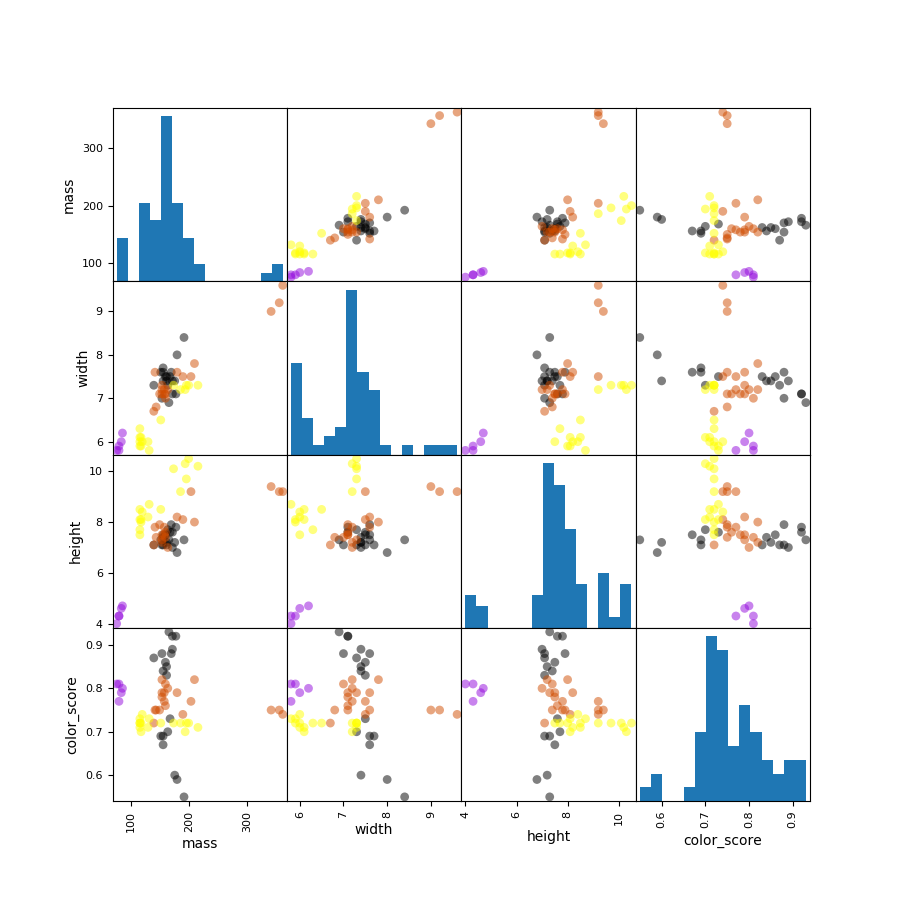

In [4]:
from matplotlib import cm

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c=y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Plotando atributos em 3 dimensões:
</p>

<IPython.core.display.Javascript object>


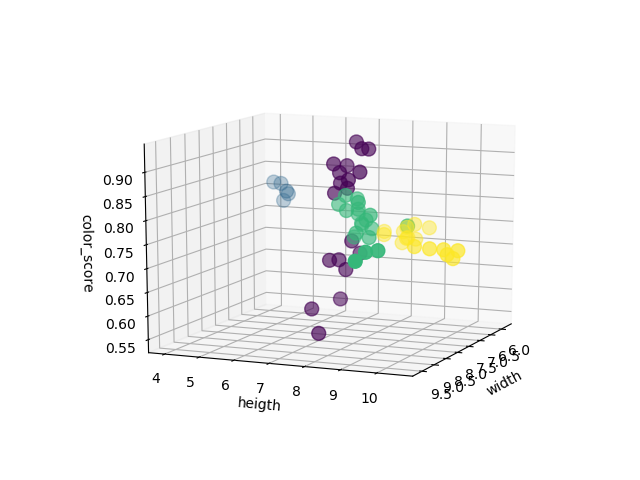

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['width'], X['height'], X['color_score'], c=y, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('heigth')
ax.set_zlabel('color_score')
plt.show()


<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Separando os dados em treino e teste:
</p>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
# Criação de dicionário para facilitar a leitura dos dados de saída
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Criando um classificador com K-NN:
</p>

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Treinar o classificador usando os dados de treino.
</p>

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Estimar a acurácia do classificador em dados futuros usando os dados de teste.
</p>

Acurácia é a quantidade de objetos do conjunto de teste cujo label correto foi previsto pelo classificador.

In [11]:
knn.score(X_test, y_test)

0.7333333333333333

Usando o classificador para classificar um objeto.

In [12]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.7]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

Quão a acurácia é impactada pelo valor de k?

<IPython.core.display.Javascript object>


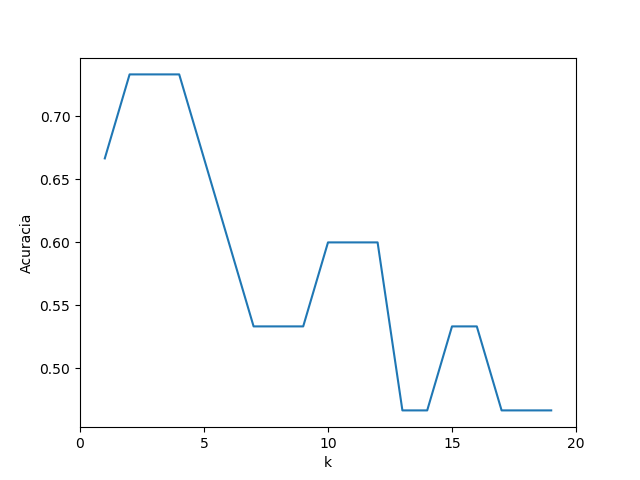

([<matplotlib.axis.XTick at 0xf7b0400>,
 <a list of 5 Text xticklabel objects>)

In [14]:
k_range = range(1,20)
scores = []

for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
        
plt.figure()        
plt.xlabel('k')
plt.ylabel('Acuracia')
plt.plot(k_range, scores)
plt.xticks([0,5,10,15,20])